In [1]:
import _pickle as cPickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from modules import optimizer

In [18]:
df = pd.read_csv('FFH030424.txt',sep='\t',header=None)[[0,1,2,3,20]]
df

,0,1,2,3,20
0,Saka,(M),ARS,£9.2,156.38
1,Haaland,(F),MCI,£14.5,152.46
2,Salah,(M),LIV,£13,145.02
3,Watkins,(F),AVL,£8.9,135.46
4,Foden,(M),MCI,£8.2,131.30
...,...,...,...,...,...
687,Lonergan,(G),EVE,£3.9,0.00
688,Bergström,(G),CHE,£3.9,0.00
689,Mings,(D),AVL,£4.1,-0.67
690,Rodák,(G),FUL,£3.9,-1.05


In [20]:
df.columns = ['name','position','team','price','expected_score']
df

,name,position,team,price,expected_score
0,Saka,(M),ARS,£9.2,156.38
1,Haaland,(F),MCI,£14.5,152.46
2,Salah,(M),LIV,£13,145.02
3,Watkins,(F),AVL,£8.9,135.46
4,Foden,(M),MCI,£8.2,131.30
...,...,...,...,...,...
687,Lonergan,(G),EVE,£3.9,0.00
688,Bergström,(G),CHE,£3.9,0.00
689,Mings,(D),AVL,£4.1,-0.67
690,Rodák,(G),FUL,£3.9,-1.05


In [16]:
select_team()

In [3]:
with open(r"elements.pickle", "rb") as inputfile:
    data = cPickle.load(inputfile)

In [8]:
data.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'form', 'id', 'in_dreamteam', 'news',
       'news_added', 'now_cost', 'points_per_game', 'selected_by_percent',
       'special', 'squad_number', 'status', 'team', 'team_code',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'web_name',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded',
       'influence_rank', 'influence_r

<AxesSubplot: xlabel='now_cost', ylabel='total_points'>

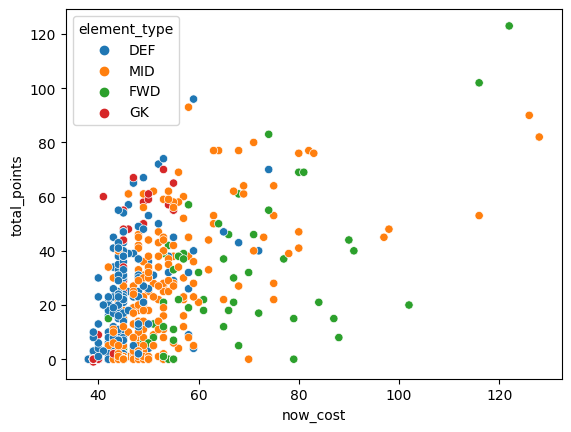

In [13]:
sns.scatterplot(x=data.now_cost, y=data.total_points, hue=data.element_type.map({1:'GK',2:'DEF',3:'MID',4:'FWD'}))

In [31]:
data.loc[(data.total_points>60)].loc[data.element_type==4].sort_values('total_points', ascending=False)[['web_name','total_points','now_cost','element_type']]

,web_name,total_points,now_cost,element_type
423,Haaland,123,122,4
576,Kane,102,116,4
96,Toney,83,74,4
25,Jesus,69,80,4
376,Firmino,69,81,4
281,Mitrović,61,68,4
